# Unlocking Hearts: Machine Learning’s Prognosis

 Let’s break down the process of predicting heart disease using machine learning into simple steps that anyone can understand:

**1. Understanding the Goal**:

Our goal is to create a smart computer program that can predict whether a person has heart disease or not.
Imagine it as a digital doctor that analyzes medical information to give a diagnosis.

> Predict whether a person has a heart disease or not

**2. The Data**:

We collect data about people’s health, like their age, blood pressure, cholesterol levels, and other relevant details.
Think of it as gathering clues about a person’s health from their medical records.

> Kaggle Dataset: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

**3. Checking Our Work:**

We need a way to measure how well our program is doing.
It’s like checking if our digital doctor’s predictions match the real outcomes.

> If we can create a model with 95% accuracy then pursue this project otherwise look for other dataset available

**4. Important Clues (Features):**

Certain health indicators are like puzzle pieces that help us solve the heart disease mystery.
These clues include things like age, blood pressure, and cholesterol levels.

> Refer to the Kaggle Dataset mentioned above

For the actual implementations, refer to **Part 1** below 

**5. Building Our Model:**

We create a special computer model that learns from the data.
Imagine it as teaching our digital doctor to recognize patterns in the clues.

These are the model that will be use
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

For the actual implementations, refer to **Part 2** below 

**6. Testing and Learning:**

We test our model using new data that it hasn’t seen before.

We measure using Cross-validated classification metrics
1. Accuracy
2. Precision
3. Recall
4. F1

then identify the Features if they are relevant/irrelevant in prediction

For the actual implementations, refer to **Part 3** below 

# Part 1

#### Tools Preparations

When performing data analysis and manipulation, pandas, Matplotlib, Scikit-learn, and NumPy are indispensable tools.

1. ``Pandas`` is a powerful Python library for data manipulation and analysis
2. ``Matplotlib`` is a popular plotting library that allows you to create visualizations from your data
3. ``NumPy`` is a fundamental library for numerical computing in Python
4. ``Scikit-learn`` is an open-source machine learning library for Python that offers tools for Classification, Regression, Clustering, Dimensionality Reduction, Model Selection and Preprocessing

In [2]:
from notebookutils import mssparkutils
import requests
import os


# data exploration
import pandas as pd
import numpy as np
import seaborn as sns

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# evaluation and metrics
from sklearn.model_selection  import (
    train_test_split, 
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV
    )
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay,
    roc_curve,
    auc
)


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 4, Finished, Available)

#### Data Loading and Exploratory Analysis

We want to learn a lot about the data and know it inside out.

1. What are you looking to figure out?
2. What sorts of data are there, and how do we handle each kind?
3. What data is missing, and what do we do about it?
4. Where are the unusual points, and why are they important?
5. What can you do to tweak or improve the data to make it better?

In [5]:
df = pd.read_csv('/lakehouse/default/Files/heart-disease-classification-pipeline/heart-disease.csv')
df.shape

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 7, Finished, Available)

(303, 14)

In [6]:
df.head()

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 8, Finished, Available)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 9, Finished, Available)

<Axes: xlabel='target'>

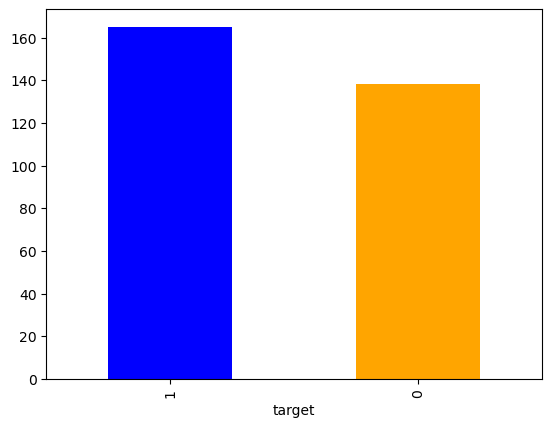

In [7]:
df['target'].value_counts().plot(kind='bar',color=['blue','orange'])

In [8]:
df.info()

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 10, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
## check missing values
#df.isnull().sum()
df.isna().sum()

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 11, Finished, Available)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 12, Finished, Available)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Disease frequency based on Sex

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 13, Finished, Available)

<Axes: xlabel='sex'>

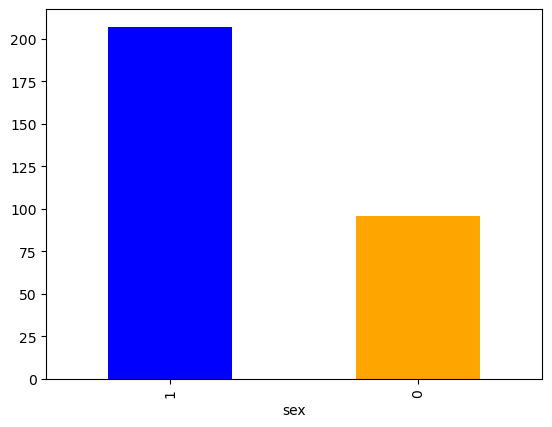

In [11]:
df.sex.value_counts().plot(kind='bar',color=['blue','orange'])

#### Crosstab plotting of Disease frequency based on Sex

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 14, Finished, Available)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

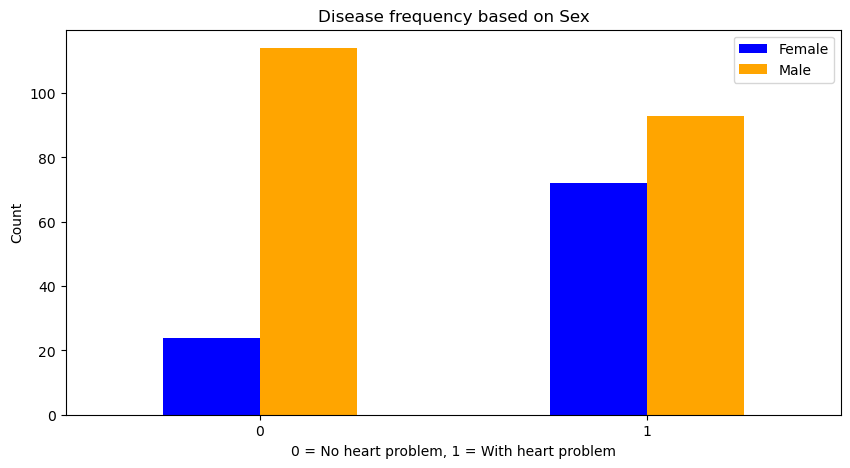

In [12]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar', color=['blue','orange'],figsize=(10,5))
plt.title('Disease frequency based on Sex')
plt.xlabel('0 = No heart problem, 1 = With heart problem')
plt.ylabel('Count')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

#### Disease comparison between Age and Max Heart

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 15, Finished, Available)

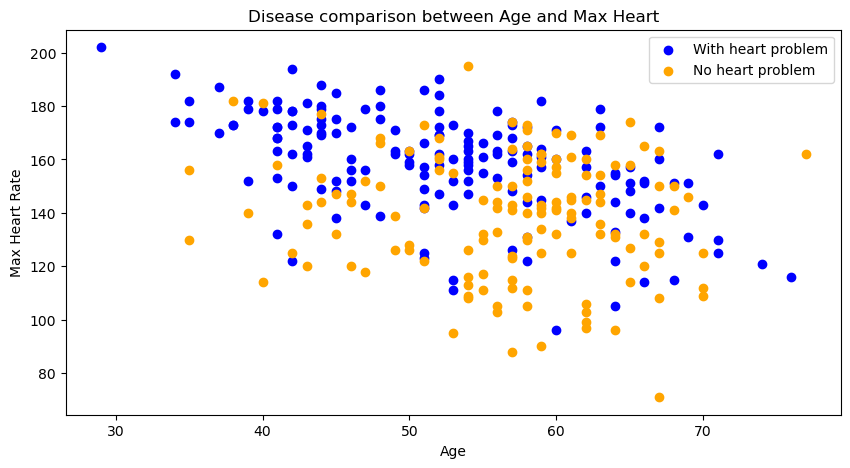

In [13]:
plt.figure(figsize=(10,5))

#positive example
plt.scatter(df.age[df.target ==1], df.thalach[df.target==1],c='blue')

#negative
plt.scatter(df.age[df.target ==0], df.thalach[df.target==0],c='orange')

plt.title('Disease comparison between Age and Max Heart')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['With heart problem','No heart problem'])



#### Age Distribution

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 16, Finished, Available)

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

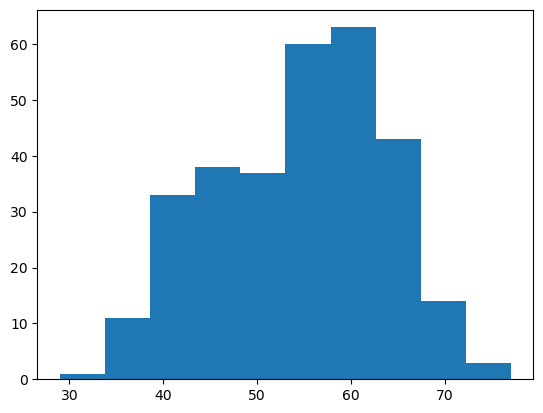

In [14]:
fig, ax = plt.subplots()
ax.hist(df.age)

#### Heart disease Frequency Versus Chest Pain Type

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 17, Finished, Available)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

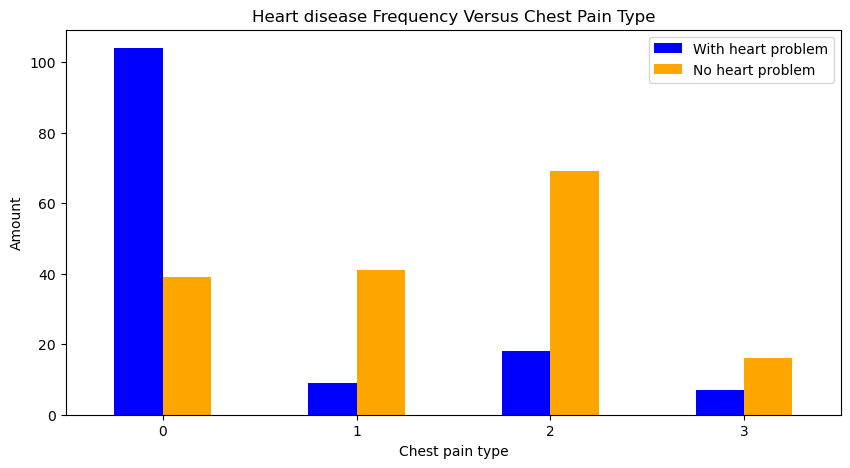

In [15]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,5),color=['blue','orange'])
plt.title('Heart disease Frequency Versus Chest Pain Type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['With heart problem','No heart problem'])
plt.xticks(rotation=1)

#### Correlation matrix

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 18, Finished, Available)

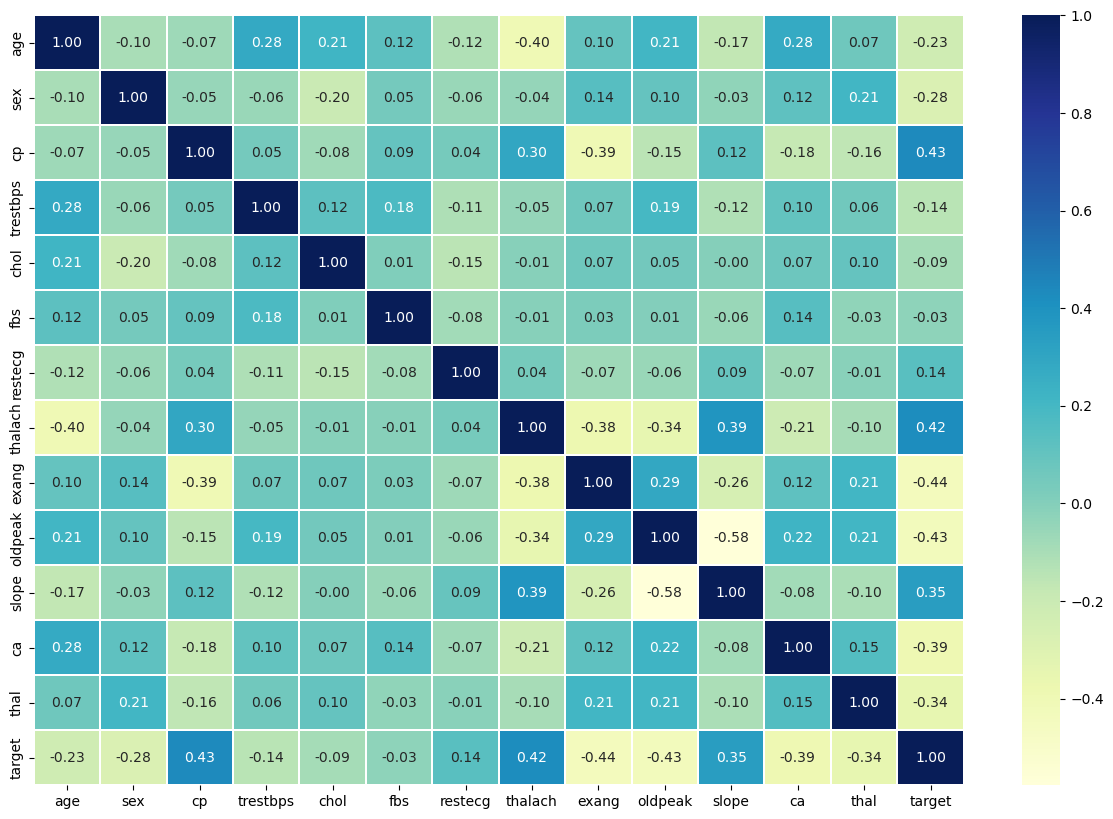

In [16]:
matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(matrix, annot=True,linewidths=0.1,fmt='.2f',cmap='YlGnBu')


# Part 2

#### Split and Training data

In [17]:
np.random.seed(1000)

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 19, Finished, Available)

In [18]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 20, Finished, Available)

Having partitioned our dataset into training and testing subsets, we are now poised to construct a machine learning model.

The model will undergo training (pattern discovery) using the training subset.

Subsequently, the testing subset will be employed to evaluate the model (pattern application).

We plan to experiment with three distinct machine learning algorithms:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

#### Create a dictionary of models to use for training

In [19]:
models_list = {
    "Logistic Regression" : LogisticRegression(max_iter=10000),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 21, Finished, Available)

#### Create a generic function to fit and score the model and run it againt the models_list


The ``fit_scoring`` function fits and assesses specified machine learning models. 

Here's a breakdown of the parameters:

> models: a dictionary containing various Scikit-Learn machine learning models.

> X_train: the dataset used for training, excluding labels.

> X_test: the dataset used for testing, also without labels.

> y_train: the labels corresponding to the training data.

> y_test: the labels corresponding to the test data.


In [20]:
def fit_scoring(models, X_train, X_test, y_train, y_test):
    np.random.seed(1000)

    # dictionary to store model's score
    scores = {}

    for x, model in models_list.items():
        # model fitting
        model.fit(X_train,y_train)

        # evaluate the score and append to the score dictionary
        scores[x] = model.score(X_test,y_test)
    
    return scores


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 22, Finished, Available)

# Part 3

#### Create a baseline by running the models

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 23, Finished, Available)

2024-04-20:07:03:50,438 WARNING  [tracking_store.py:153] log_inputs not supported


2024-04-20:07:04:02,459 WARNING  [tracking_store.py:153] log_inputs not supported


2024-04-20:07:04:08,585 WARNING  [tracking_store.py:153] log_inputs not supported


<Axes: >

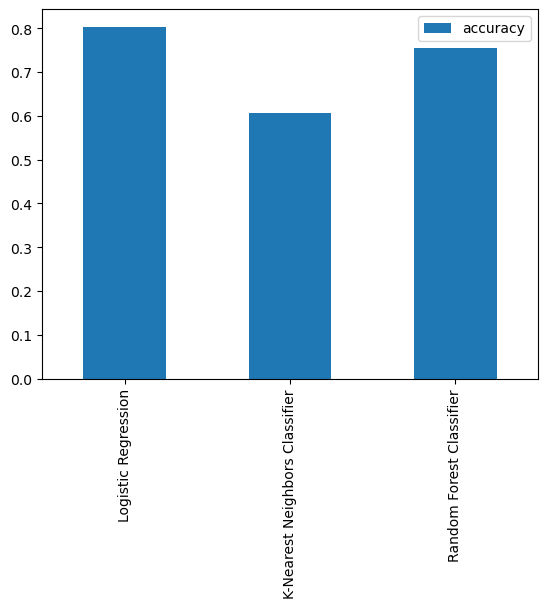

In [21]:
scores = fit_scoring(models_list,X_train,X_test,y_train,y_test)
pd.DataFrame(scores, index=['accuracy']).T.plot.bar()

#### 

With our baseline model established which ``Logistic Regression`` was the winner, it's clear that initial predictions are not the sole indicators for subsequent actions. So, what's the next course of action?

Consider delving into:

- **Hyperparameter Optimization**: Refining the model parameters for improved performance.
- **Determining Feature Significance**: Identifying which features most influence the model's predictions.
- **Analyzing the Confusion Matrix**: Evaluating the accuracy of classification.
- **Implementing Cross-Validation**: Ensuring the model's robustness across different data subsets.
- **Assessing Precision**: Measuring the model's exactness.
- **Examining Recall**: Gauging the model's completeness.
- **Calculating the F1 Score**: Combining precision and recall into a single metric.
- **Generating a Classification Report**: Summarizing the model's performance metrics.
- **Plotting the ROC Curve**: Visualizing the trade-off between true positive rate and false positive rate.
- **Measuring the Area Under the Curve (AUC)**: Quantifying the overall performance of the model.

We will drop KNeighborsClassifier() and just use the LogisticRegression() and RandomForestClassifer() for Hyperparameters tuning

#### RandomForestClassifier() hyperparameter optimization using RandomizedSearchCV()

In [22]:
number_of_iteration = 20
cross_fold = 5

hyperparameter_results = {}

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 24, Finished, Available)

In [23]:
# hyperparameter for RandomForestClassifier()
randomforest_grid = {
    'n_estimators': np.arange(10,10000,50),
    'max_depth': [None,3, 5, 10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2),
    
}

randomforest_regression = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions = randomforest_grid,
                        cv=cross_fold,
                        n_iter=number_of_iteration,
                        verbose=True
                        )
randomforest_regression.fit(X_train, y_train)
random_forest_score = randomforest_regression.score(X_test,y_test)
hyperparameter_results['randomsearchcv'] = [
    {
        'model' : 'randomforestclassifier',
        'details': {
            'score': random_forest_score,
            'best_params': randomforest_regression.best_params_,
            'preoptimized': True
        }
    }
]


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 25, Finished, Available)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2024-04-20:07:04:17,26 WARNING  [tracking_store.py:153] log_inputs not supported
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


#### LogisticRegression() hyperparameter optimization using RandomizedSearchCV

In [24]:
# hyperparameter for LogisticRegression()
logistic_grid = {
    "C": np.logspace(-10,10,40),
    'solver': ['liblinear']
}

logistic_regression = RandomizedSearchCV(LogisticRegression(),
                     param_distributions=logistic_grid,
                     cv=cross_fold,
                     n_iter=number_of_iteration,
                     verbose=True)

logistic_regression.fit(X_train,y_train)
logistic_score = logistic_regression.score(X_test,y_test)
hyperparameter_results['randomsearchcv'].append(
    {
        'model' : 'logistic_regression',
        'details': {
            'score': logistic_score,
            'best_params': logistic_regression.best_params_,
            'preoptimized': True

        }
    }
)

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 26, Finished, Available)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2024-04-20:07:12:09,316 WARNING  [tracking_store.py:153] log_inputs not supported


#### RandomForestClassifier() hyperparameter optimization using GridSearchCV()

The RandomForestClassifier gave a slight edge then Logistic Regression. Let us try to improve the result using GridSearchCV

Will not run these code block

In [25]:
randomforest_grid = {
    'n_estimators': np.arange(10,150,50),
    'max_depth': [3, 5],
    'min_samples_split': np.arange(16,20,2),
    'min_samples_leaf': np.arange(5,20,2),
    
}

gs_rf_reg = GridSearchCV(RandomForestClassifier(), 
                        param_grid=randomforest_grid,
                        cv=cross_fold,
                        verbose=True)

#gs_rf_reg.fit(X_train,y_train)
#fs_rf_reg_score = gs_rf_reg.score(X_test,y_test)

# hyperparameter_results['gridsearchcv'] = [
#     {
#         'model' : 'randomforestclassifier',
#         'details': {
#             'score': fs_rf_reg_score,
#             'best_params': gs_rf_reg.best_params_,
#             'preoptimized': False
#         }
#     }
# ]



StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 27, Finished, Available)

In [26]:
hyperparameter_results

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 28, Finished, Available)

{'randomsearchcv': [{'model': 'randomforestclassifier',
   'details': {'score': 0.819672131147541,
    'best_params': {'n_estimators': 5960,
     'min_samples_split': 12,
     'min_samples_leaf': 5,
     'max_depth': 3},
    'preoptimized': True}},
  {'model': 'logistic_regression',
   'details': {'score': 0.819672131147541,
    'best_params': {'solver': 'liblinear', 'C': 0.17012542798525856},
    'preoptimized': True}}]}

To assess our optimized machine learning classifier comprehensively, we’ll look beyond mere accuracy. We’ll delve into the following metrics:

- ROC Curve and AUC Score: 

These will help us understand the trade-offs between true positive rate and false positive rate.

**Confusion Matrix:** This will provide us with a detailed breakdown of correct and incorrect classifications.

**Classification Report:** It includes key metrics such as precision, recall, and F1-score for a thorough evaluation.

**Precision:** Measures the accuracy of positive predictions.

**Recall:** Captures the ability of the model to identify all relevant instances.

**F1-Score:** Harmonizes the balance between precision and recall.

For robustness, we’ll employ cross-validation wherever feasible to ensure our model’s performance is consistent across different subsets of the data.

Before we can dive into these metrics, we need to generate predictions using our trained model.

In [27]:
y_preds = randomforest_regression.predict(X_test)

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 29, Finished, Available)

2024-04-20:07:12:21,497 WARNING  [tracking_store.py:153] log_inputs not supported


#### Display ROC Curve

Explaining an ROC curve in simple terms!

Imagine you're playing a game where you have to guess whether a coin is going to land heads or tails. Now, let's say you have a special coin-tossing machine that makes a prediction every time before you toss the coin. The ROC curve is a way to measure how good this machine is at predicting the coin tosses correctly.

Here's how it works:
- Every time the machine predicts 'heads,' and it's actually heads, that's a **true positive**.
- If it predicts 'heads' but it's tails, that's a **false positive**.
- The ROC curve plots the rate of true positives against the rate of false positives for different thresholds of the machine's predictions.

The closer the ROC curve is to the top left corner of the plot, the better the machine is at predicting the coin tosses. If the curve is just a diagonal line from the bottom left to the top right, then the machine is no better than random guessing.

In more technical terms, the ROC curve shows the trade-off between **sensitivity** (or the true positive rate) and **specificity** (1 – the false positive rate). A perfect predictor would have a point in the top left corner of the ROC space, indicating 100% sensitivity (no false negatives) and 100% specificity (no false positives).

To sum it up, the ROC curve helps you understand how well your prediction model works and whether it's guessing better than just flipping a coin. It's like a scorecard for the prediction machine!


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 30, Finished, Available)

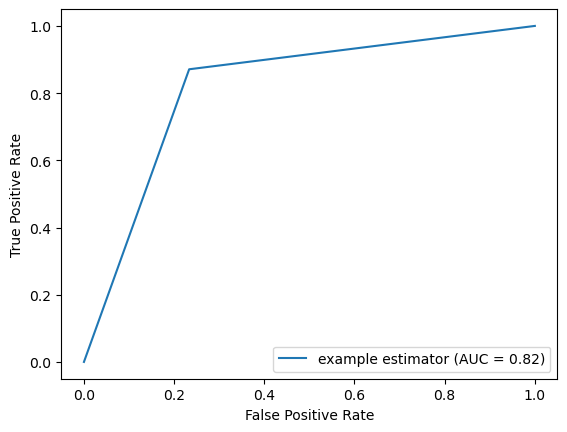

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

#### Display Confusion Matrix

Explaining Confusion Matrix in simple terms!

A confusion matrix is like a report card for your machine's ability to classify things correctly. Imagine you have a basket of fruit, and you've trained your machine to sort them into apples and oranges. After it sorts them, you want to check how well it did.

Here's what the confusion matrix tells you:
- **True Positives (TP)**: These are the apples that the machine correctly identified as apples.
- **True Negatives (TN)**: These are the oranges that the machine correctly identified as oranges.
- **False Positives (FP)**: These are the oranges that the machine mistakenly thought were apples.
- **False Negatives (FN)**: These are the apples that the machine mistakenly thought were oranges.

The confusion matrix is a table that shows these four outcomes. It helps you see not just when the machine is right, but also how it's wrong. For example, if it's getting a lot of false positives, it might be too eager to call something an apple.

In the end, the confusion matrix gives you a detailed breakdown of the machine's performance, so you can understand its strengths and weaknesses and make it better at sorting your fruit—or whatever else you're teaching it to do!

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 31, Finished, Available)

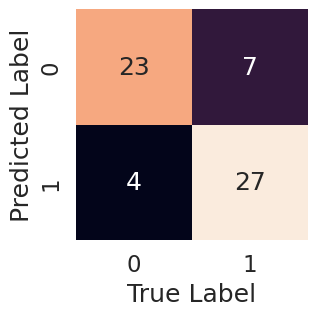

In [29]:
sns.set(font_scale=1.5)
def confusion_matric_plot(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                        annot=True,
                        cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

confusion_matric_plot(y_test, y_preds)

We will assess our model’s performance metrics, including accuracy, precision, recall, and f1-score, through cross-validation. 
For this purpose, we’ll employ the **cross_val_score()** function.

In [30]:
randomforest_regression.best_params_

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 32, Finished, Available)

{'n_estimators': 5960,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [31]:
rf = RandomForestClassifier(n_estimators= 5960,
    min_samples_split= 12,
    min_samples_leaf= 5,
    max_depth= 3
)



StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 33, Finished, Available)

In [32]:
cv_accuracy = np.mean(cross_val_score(rf,X,y,cv=cross_fold,scoring='accuracy'))


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 34, Finished, Available)

In [33]:
cv_precision = np.mean(cross_val_score(rf,X,y,cv=cross_fold,scoring='precision'))


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 35, Finished, Available)

In [34]:
cv_recall = np.mean(cross_val_score(rf,X,y,cv=cross_fold,scoring='recall'))


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 36, Finished, Available)

In [35]:
cv_f1 = np.mean(cross_val_score(rf,X,y,cv=cross_fold,scoring='f1'))


StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 37, Finished, Available)

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 38, Finished, Available)

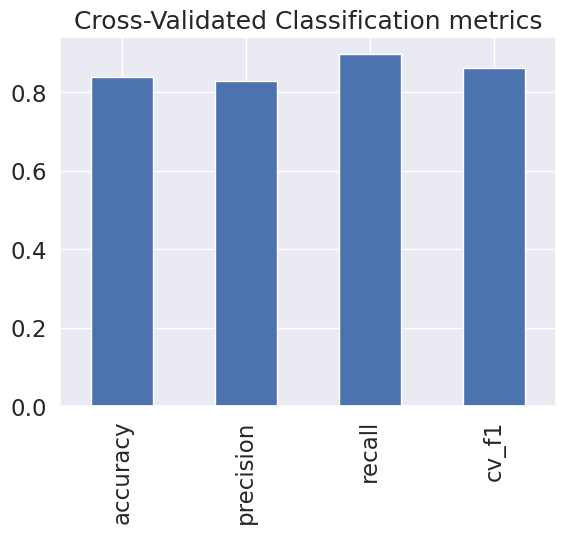

In [36]:
cv_metrics = pd.DataFrame({
    "accuracy": cv_accuracy,
    "precision": cv_precision,
    "recall": cv_recall,
    "cv_f1": cv_f1
},index=[0]).T.plot.bar(title="Cross-Validated Classification metrics",legend=False)


#### Understanding Feature Importance

Feature importance can be thought of as determining "which features have the greatest influence on the predictions of the model, and in what manner do they impact it?"

The method for identifying feature importance varies across different machine learning models.

Now, let's explore the feature importance for our Random Forest Classifier model...

In [37]:
rf.fit(X_train,y_train)

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 39, Finished, Available)

2024-04-20:07:41:21,893 WARNING  [tracking_store.py:153] log_inputs not supported
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=5960)

StatementMeta(, 0252da28-f73f-43c7-973c-37b04496e03c, 45, Finished, Available)

<Axes: title={'center': 'Feature importance'}>

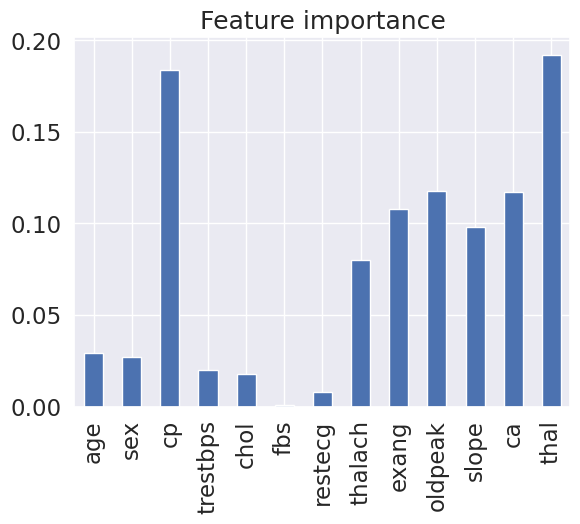

In [43]:
features = rf.feature_importances_
features_dict = dict(zip(df.columns, list(features)))

features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature importance',legend=False)

If you're yet to achieve your target evaluation metric, consider the following:

- Is there an opportunity to **gather additional data**?
- Have you explored more advanced models, such as **CatBoost or XGBoost**?
- Is there room to enhance your existing models further than previous efforts?

Once your model meets the desired evaluation metric:

- What's the best method to **package and distribute** your model for use by others?